In [1]:
import torch
import torch.nn as nn
#from torch.nn import Module, Linear
import numpy as np
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import random
#from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import random
from matplotlib import pyplot as plt
f = plt.figure(figsize=(16,10))
M = 1000
a_list = [random.uniform(1,3) for i in range(M)]
b_list = [random.uniform(2,5) for i in range(M)]   
#print (b_list)
#print (a_list)
#ax3 = f.add_subplot(111)
#ax3.plot(a_list,np.zeros(len(a_list)),marker='o',color='r')
#ax3.plot(b_list,np.zeros(len(b_list)),marker='o',color='g')
#ax3.plot([0,5],[0,0],color='b',linestyle='--') 

In [3]:
a_dataset = np.asarray(a_list).flatten()
#print (a_dataset.max())
b_dataset = np.asarray(b_list).flatten()
#print (b_dataset.max())
#dtype = torch.FloatTensor
#real = Variable(torch.from_numpy(b_dataset).type(dtype),requires_grad=False).view(100,1)
#print (real.max())

In [4]:
class Mlp(nn.Module):
    def __init__(self):
        super(Mlp, self).__init__()
        self.fc1 = nn.Linear(1, 100) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.sig = nn.Sigmoid()
        #self.tanh = nn.Tanh()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sig(out)
        #out = self.tanh(out)
        return out

model = Mlp()

In [5]:
def train_discriminator(net, real_dataset, fake_dataset, iteration):
    bsr = len(real_dataset)
    bsf = len(fake_dataset)
    dtype = torch.FloatTensor
    real = Variable(torch.from_numpy(real_dataset).type(dtype),requires_grad=False).view(bsr,1)
    fake = Variable(torch.from_numpy(fake_dataset).type(dtype),requires_grad=False).view(bsf,1)
    real_target  = torch.ones(bsr, 1)
    fake_target = torch.zeros(bsf, 1)

    # draw figure
    samples = np.concatenate((real, fake))
    left, right = samples.min(), samples.max()
    margin = (right - left) / 10
    left -= margin
    right += margin

    test_pts = np.linspace(left, right, 1000).astype('float32')
    test_pts_cpu = torch.from_numpy(test_pts.reshape(-1, 1)).cpu()
    
    # optimal option
    loss = nn.BCELoss()
    #loss = nn.BCEWithLogitsLoss()
    #loss = nn.MSELoss()
    #loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01) 
    prob_real = 0
    prob_fake = 0
    
    #iteration = 2
    
    for epoch in range(iteration):
        net.zero_grad()
        loss_real = loss(net(real), real_target)
        loss_fake = loss(net(fake), fake_target)
        
        loss_real.backward()
        loss_fake.backward()
                
        prob_real = np.exp(-loss_real.data[0])
        prob_fake = 1 - np.exp(-loss_fake.data[0])
        
        optimizer.step()

        #if epoch % 1000 == 0 or epoch == 1:
        if epoch == 1000 or epoch == 5000 or epoch == 9000:
            prob_real /= 1
            prob_fake /= 1
            
            fig_w, fig_h, dpi = 700, 500, 100
            titlestr = f'iter {epoch}/{iteration}, probability for real: {prob_real:.7}, fake: {prob_fake:.7}'
            print(titlestr)
            
            fig = plt.figure(figsize=(fig_w/dpi, fig_h/dpi), dpi=dpi)
            ax  = fig.add_subplot(111)
            
            scores = net(test_pts_cpu)
            #print (scores)
            ax.scatter(real, np.zeros(bsr), c='red', marker='+', s=100, label='real')
            ax.scatter(fake, np.zeros(bsf), c='blue', marker='x', s=50, label='fake')
            ax.plot(test_pts, Variable(scores).data.numpy())
            #ax.scatter(test_pts,scores, c='yellow', marker='q', s=100)
            plt.ylim([-0.1, 1.1])
            plt.xlim([left, right])

            plt.xticks(fontsize=12)
            plt.yticks(fontsize=12)
            plt.title(titlestr, fontsize=12)
            plt.legend(loc=2, fontsize=12)
            plt.tight_layout()
            #plt.savefig(f'{workdir}/{it:06}.png')
            
            prob_real = 0.
            prob_fake = 0.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


iter 1000/15000, probability for real: 0.7370165, fake: 0.2079785
iter 5000/15000, probability for real: 0.7523923, fake: 0.2203576
iter 9000/15000, probability for real: 0.7458402, fake: 0.2088451


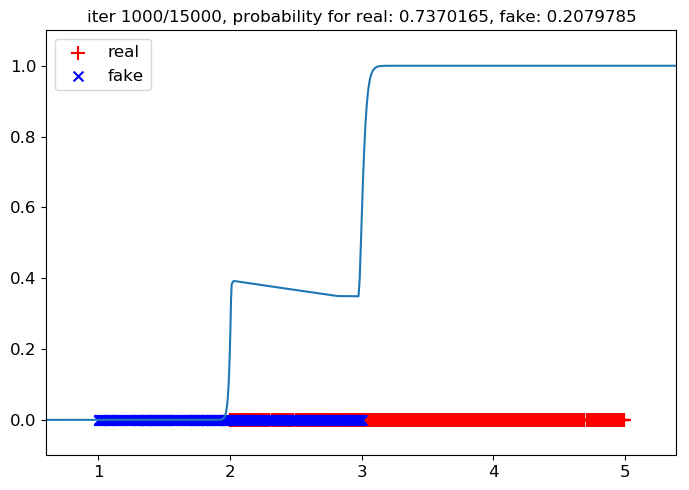

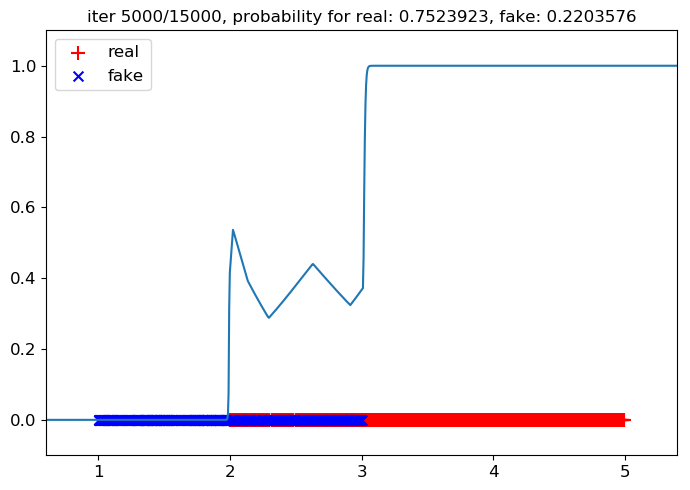

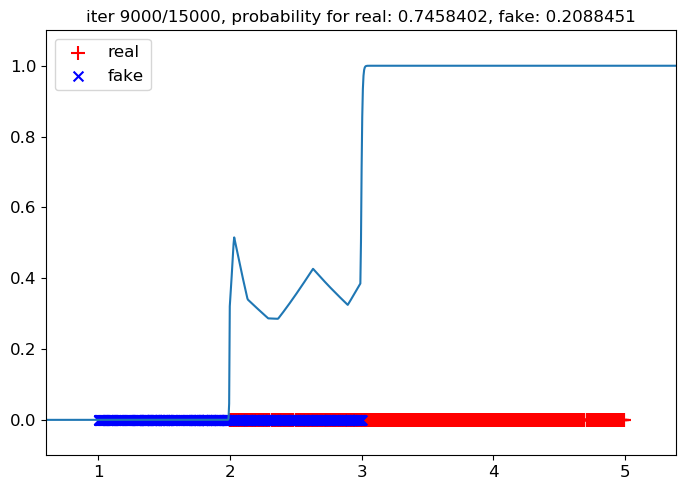

In [6]:
train_discriminator(model, b_dataset, a_dataset, 15000)